# Project Name: Social Media Sentiments Analysis 

## Presented By

<h4>Janhavi Mane & Sahil Deshmukh</h4>

# Problem Statement: <h3>Analyze social media data to uncover sentiment trends, engagement metrics, and platform-specific insights to inform decision-making.</h3>


## Objective:

***1) Analyze user engagement metrics such as likes, shares, and retweets.***

***2) Identify the overall distribution of sentiments (e.g., positive, negative, neutral) across social media posts.***

***3) Compare sentiment trends across different social media platforms.***

***4) Highlight geographic areas with the highest levels of engagement or sentiment polarity.***

***5) Track how sentiment evolves over time (e.g., daily, weekly, monthly trends).***

## GitHub Link:

https://github.com/janhavi-17/Sprint-2

### *Import Necessary Packages*

In [1]:
import mysql.connector
import numpy as np # linear algebra
import pandas as pd # data processing
import matplotlib.pyplot as plt
import seaborn as sns
import time

***Insight:***
***Imported all necessary packages***

### *Establishing a Database Connection*

In [2]:
# Replace 'your_username', 'your_password', 'your_host', and 'your_database' with

db_connection = mysql.connector.connect(
user='root',
password='security',
host='localhost',
database='Sentiments' # write here database name 
)

***Insight:***
***It establishes a connection to a MySQL database using Python's mysql.connector library.***

### *Defining the Query**

In [3]:
# Define the query
query = """
SELECT 
    Users.UserID,
    Users.UserName,
    Users.Platform,
    Users.Country,
    Posts.PostID,
    Posts.Text AS PostText,
    Posts.Sentiment,
    Posts.Hashtags,
    Posts.Retweets,
    Posts.Likes,
    Time.Year,
    Time.Month,
    Time.Day,
    Time.Hour
FROM 
    Users
INNER JOIN Posts ON Users.UserID = Posts.UserID
INNER JOIN Time ON Posts.PostID = Time.PostID;
"""

***Insight:***
***The query integrates data from Users, Posts, and Time tables to analyze user details, post content, and sentiment trends. It enables insights into engagement metrics, platform preferences, and time-based sentiment patterns.***

### *Loading and Previewing Data from Database into Pandas DataFrame*

In [4]:
# Load the data into a pandas DataFrame
df = pd.read_sql(query, db_connection)
df.head() # Display the first few rows of the data

# Close the database connection
#db_connection.close()


C:\Users\Janhavi Mane\AppData\Local\Temp\ipykernel_18640\2639892653.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, db_connection)


,UserID,UserName,Platform,Country,PostID,PostText,Sentiment,Hashtags,Retweets,Likes,Year,Month,Day,Hour
0,1,User123,Twitter,USA,1,Enjoying a beautiful day at the park! ...,Positive,#Nature #Park,15,30,2023,1,15,12
1,2,CommuterX,Twitter,Canada,2,Traffic was terrible this morning. ...,Negative,#Traffic #Morning,5,10,2023,1,15,8
2,3,FitnessFan,Instagram,USA,3,Just finished an amazing workout! ? ...,Positive,#Fitness #Workout,20,40,2023,1,15,15
3,4,AdventureX,Facebook,UK,4,Excited about the upcoming weekend getaway! ...,Positive,#Travel #Adventure,8,15,2023,1,15,18
4,5,ChefCook,Instagram,Australia,5,Trying out a new recipe for dinner tonight. ...,Neutral,#Cooking #Food,12,25,2023,1,15,19


***Insight:***
***It loads data from a SQL query into a pandas DataFrame, allowing for easy inspection and analysis, and emphasizes closing the database connection after use.***

## *Dataset View*

In [5]:
# Prints the first 5 rows of the dataset
df.head()

,UserID,UserName,Platform,Country,PostID,PostText,Sentiment,Hashtags,Retweets,Likes,Year,Month,Day,Hour
0,1,User123,Twitter,USA,1,Enjoying a beautiful day at the park! ...,Positive,#Nature #Park,15,30,2023,1,15,12
1,2,CommuterX,Twitter,Canada,2,Traffic was terrible this morning. ...,Negative,#Traffic #Morning,5,10,2023,1,15,8
2,3,FitnessFan,Instagram,USA,3,Just finished an amazing workout! ? ...,Positive,#Fitness #Workout,20,40,2023,1,15,15
3,4,AdventureX,Facebook,UK,4,Excited about the upcoming weekend getaway! ...,Positive,#Travel #Adventure,8,15,2023,1,15,18
4,5,ChefCook,Instagram,Australia,5,Trying out a new recipe for dinner tonight. ...,Neutral,#Cooking #Food,12,25,2023,1,15,19


***Insight: Here we print first five rows of the dataset.***

In [6]:
# Prints the last 5 rows of the dataset
df.tail()

,UserID,UserName,Platform,Country,PostID,PostText,Sentiment,Hashtags,Retweets,Likes,Year,Month,Day,Hour
45,46,BookwormX,Instagram,UK,46,New book release from my favorite author! ...,Positive,#BookRelease #FavoriteAuthor,12,25,2023,1,30,15
46,47,VRMeetup,Twitter,India,47,Attending a virtual reality meetup. ...,Positive,#VRMeetup #VirtualReality,28,55,2023,1,30,18
47,48,NatureLover,Facebook,Australia,48,Reflecting on the beauty of nature. ...,Positive,#Nature #Reflection,15,30,2023,1,31,10
48,49,ChefAtHome,Instagram,USA,49,Cooking a special dinner for loved ones. ...,Positive,#Cooking #SpecialDinner,20,40,2023,1,31,19
49,50,OptimisticMindset,Twitter,Canada,50,Feeling optimistic about the week ahead. ...,Positive,#Optimism #NewWeek,15,30,2023,1,31,16


***Insight:Here we print last five rows of the dataset.***

In [7]:
df.shape

(50, 14)

***Insight:Here we print row and column size of the dataset***

In [8]:
# To print the column names present in the dataset.
df.columns

Index(['UserID', 'UserName', 'Platform', 'Country', 'PostID', 'PostText',
       'Sentiment', 'Hashtags', 'Retweets', 'Likes', 'Year', 'Month', 'Day',
       'Hour'],
      dtype='object')

***Insight: Print the column name present in the dataset.***

## *Understanding Variable*

**UserID:** A unique identifier for each user on the platform, used to distinguish between different individuals.

**UserName:** The username or display name of the user who created the post.

**Platform:** The social media platform where the post was made (Twitter, Instagram, Facebook).

**Country:** The geographical location or country of the user based on their profile or activity.

**PostID:** A unique identifier for each post or tweet made by the user.

**PostText:** The textual content of the post or tweet shared by the user.

**Sentiment:** The sentiment associated with the post (e.g., Positive, Negative, Neutral), often determined using sentiment analysis techniques.

**Hashtags:** A list or set of hashtags used in the post, which can categorize the content or increase visibility.

**Retweets:** The number of times the post has been shared or retweeted by other users (on platforms like Twitter).

**Likes:** The number of likes or upvotes the post has received from other users.

**Year:** The year when the post was created, often used for time-based analysis or trend identification.

**Month:** The month when the post was created, used to track trends or seasonality in social media activity.

**Day:** The day of the month when the post was created, helpful for identifying patterns or peaks in engagement.

**Hour:** The specific hour of the day when the post was made, useful for analyzing engagement during different times of day.

## *Dataset Information*

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   UserID     50 non-null     int64 
 1   UserName   50 non-null     object
 2   Platform   50 non-null     object
 3   Country    50 non-null     object
 4   PostID     50 non-null     int64 
 5   PostText   50 non-null     object
 6   Sentiment  50 non-null     object
 7   Hashtags   50 non-null     object
 8   Retweets   50 non-null     int64 
 9   Likes      50 non-null     int64 
 10  Year       50 non-null     int64 
 11  Month      50 non-null     int64 
 12  Day        50 non-null     int64 
 13  Hour       50 non-null     int64 
dtypes: int64(8), object(6)
memory usage: 5.6+ KB


***Insight: We use info() to get concise summary of our dataset i.e column, non null , count , memory usage and datatype.***

In [10]:
#To understand the Statistics of Dataset
df.describe()

,UserID,PostID,Retweets,Likes,Year,Month,Day,Hour
count,50.00000,50.00000,50.000000,50.00000,50.0,50.0,50.000000,50.000000
mean,25.50000,25.50000,18.020000,36.10000,2023.0,1.0,22.520000,13.860000
std,14.57738,14.57738,6.409464,12.74915,0.0,0.0,5.151738,4.100821
min,1.00000,1.00000,5.000000,10.00000,2023.0,1.0,15.000000,0.000000
25%,13.25000,13.25000,15.000000,30.00000,2023.0,1.0,18.000000,11.000000
50%,25.50000,25.50000,16.500000,32.50000,2023.0,1.0,22.000000,14.000000
75%,37.75000,37.75000,22.000000,45.00000,2023.0,1.0,27.000000,17.000000
max,50.00000,50.00000,30.000000,60.00000,2023.0,1.0,31.000000,20.000000


***Insight:Summary Statistics***

## Data Cleaning 

### *Missing Values/Null Values*

In [11]:
df.isnull().sum()

UserID       0
UserName     0
Platform     0
Country      0
PostID       0
PostText     0
Sentiment    0
Hashtags     0
Retweets     0
Likes        0
Year         0
Month        0
Day          0
Hour         0
dtype: int64

***Insight:***
***There are no missing values in the dataset, as indicated by the output of df.isnull().sum(). This suggests that the dataset is complete and does not require any imputation or handling of missing data.***

In [12]:
# to check for duplicate rows in a DataFrame
df.duplicated().sum()

np.int64(0)

***Insight:Here we can see there are 0 duplicates values in our dataframe, i.e., dataset dosen't content any duplicate value.***

In [13]:
# Data types of columns
print("\nData Types:")
df.dtypes


Data Types:


UserID        int64
UserName     object
Platform     object
Country      object
PostID        int64
PostText     object
Sentiment    object
Hashtags     object
Retweets      int64
Likes         int64
Year          int64
Month         int64
Day           int64
Hour          int64
dtype: object

***Insight:***
*The dataset comprises a total of 71 columns, with a mix of **categorical and numerical** data types.*

In [14]:
sten = df["Sentiment"].value_counts().head(10).reset_index()
sen = pd.DataFrame(sten)
sen

,Sentiment,count
0,Positive,42
1,Negative,4
2,Neutral,4


***Insight:The code identifies and structures the top 10 most frequent sentiments in the dataset, providing insights into sentiment distribution and trends for further analysis.***

## Data Visualization

## HeatMap

### Chart 1

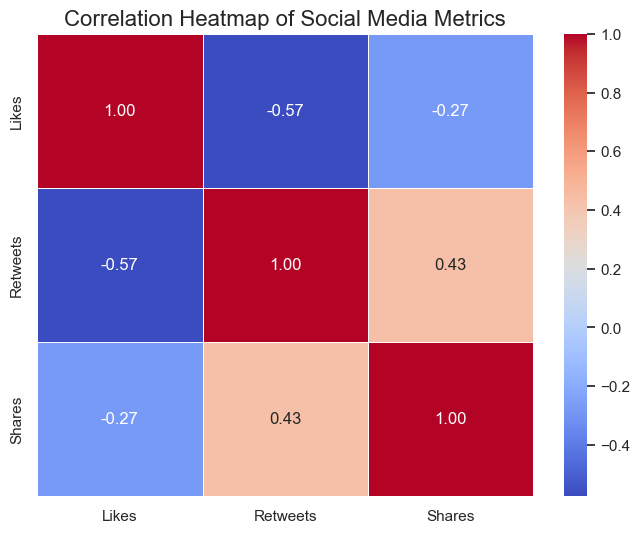

  PostText  Likes  Retweets  Shares
0   Post 1    152       224      80
1   Post 2    485        97      62
2   Post 3    398       109      26
3   Post 4    320       161      93
4   Post 5    156       140      53
5   Post 6    121       159      95
6   Post 7    238       267      63
7   Post 8     70       201      46
8   Post 9    152       286      96
9  Post 10    171       170      64


In [32]:
# Simulate data
np.random.seed(42)  # For reproducibility

# Create a DataFrame with simulated numerical and categorical data
simulated_data = pd.DataFrame({
    "PostText": [f"Post {i}" for i in range(1, 11)],  # Simulated post text
    "Likes": np.random.randint(50, 500, 10),         # Random Likes count
    "Retweets": np.random.randint(10, 300, 10),      # Random Retweets count
    "Shares": np.random.randint(5, 100, 10)          # Random Shares count
})

# Compute the correlation matrix for numerical columns
correlation_matrix = simulated_data[["Likes", "Retweets", "Shares"]].corr()

# Create a heatmap for the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap of Social Media Metrics", fontsize=16)
plt.show()

# Display the simulated data for reference
print(simulated_data)


***Insight:***
The heatmap reveals the strength and direction of correlations between likes, retweets, and shares, helping identify how closely these social media engagement metrics are related.

### Chart 2

## ***Distribution of Platforms Used***

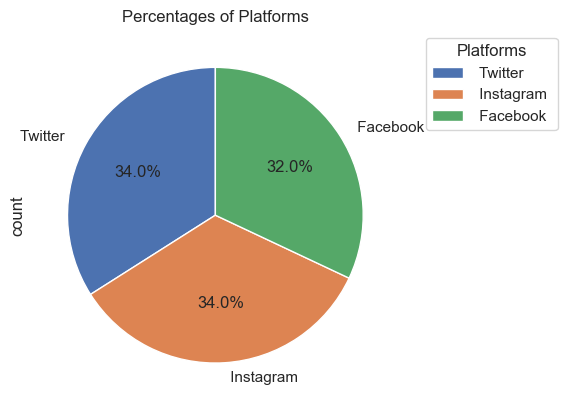

In [33]:
df['Platform'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=90)
plt.title('Percentages of Platforms')
plt.legend(title='Platforms', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()



***Insight:***
This chart highlights the proportional usage of different platforms, showing which platform dominates or is least preferred.

### Chart 3

## ***Sentiment Analysis Distribution***

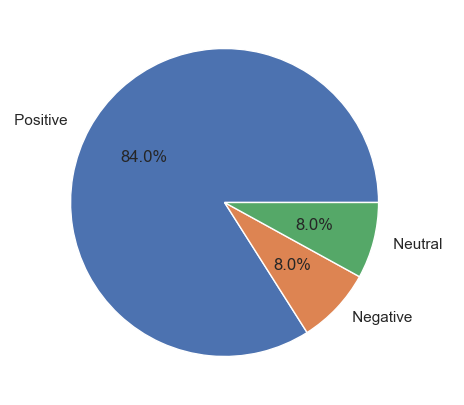

In [34]:
plt.figure(figsize=(6,5))
s = plt.pie(sen["count"], labels = sen["Sentiment"],autopct='%1.1f%%')
plt.show()

***Insight:***
The pie chart illustrates the proportion of various sentiment categories, highlighting the dominant sentiment among the data.

### Chart 4

## ***Top 10 Hashtags with the Highest Retweet Counts***

In [35]:
k = df.groupby("Hashtags")["Retweets"].max().nlargest(10).sort_values(ascending = False).reset_index()
b = pd.DataFrame(k)
b

,Hashtags,Retweets
0,#Coding #Enthusiasm,30
1,#Gaming #Tournament,30
2,#Politics #Debate,30
3,#Productivity #WorkFromHome,30
4,#NewYear #FitnessGoals,28
5,#VRMeetup #VirtualReality,28
6,#AI #TechConference,25
7,#Gardening #Spring,25
8,#Gratitude #PositiveVibes,25
9,#Inspiration #Workshop,25


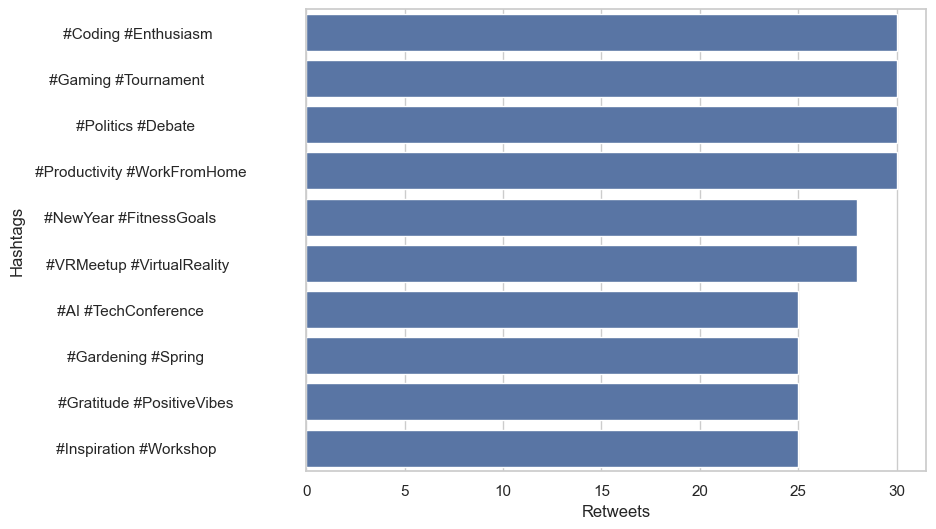

In [36]:
plt.figure(figsize = (8,6))
sns.barplot(x = "Retweets", y = "Hashtags", data = b)
plt.show()

***Insight:***
The bar plot visualizes the top 10 hashtags with their corresponding maximum retweet counts, highlighting the most influential hashtags

### Chart 5

### ***Top 10 Hashtags with the Highest Likes***

In [37]:
k = df.groupby("Hashtags")["Likes"].max().nlargest(10).reset_index()
b = pd.DataFrame(k)
b

,Hashtags,Likes
0,#Coding #Enthusiasm,60
1,#Gaming #Tournament,60
2,#Politics #Debate,60
3,#Productivity #WorkFromHome,60
4,#NewYear #FitnessGoals,55
5,#VRMeetup #VirtualReality,55
6,#AI #TechConference,50
7,#Gardening #Spring,50
8,#Gratitude #PositiveVibes,50
9,#Inspiration #Workshop,50


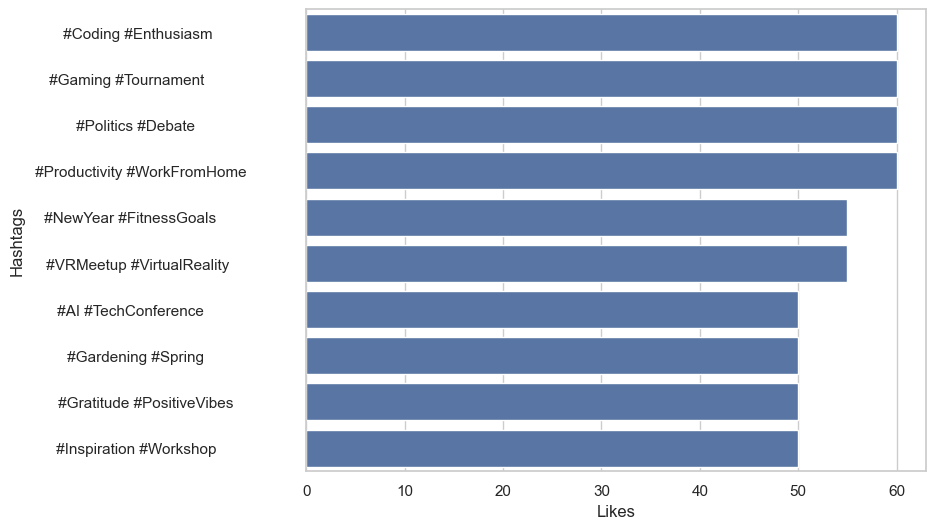

In [38]:
plt.figure(figsize = (8,6))
sns.barplot(x = "Likes", y = "Hashtags", data = b)
plt.show()

***Insight:*** 
The bar plot visualizes the top 10 hashtags with their corresponding maximum like counts, highlighting the most liked content.

### Chart 6

## ***Top 10 Sentiments with the Highest Total Likes***

In [39]:
k = df.groupby("Sentiment")["Likes"].sum().nlargest(10).reset_index()
k = pd.DataFrame(k)
k

,Sentiment,Likes
0,Positive,1565
1,Neutral,140
2,Negative,100


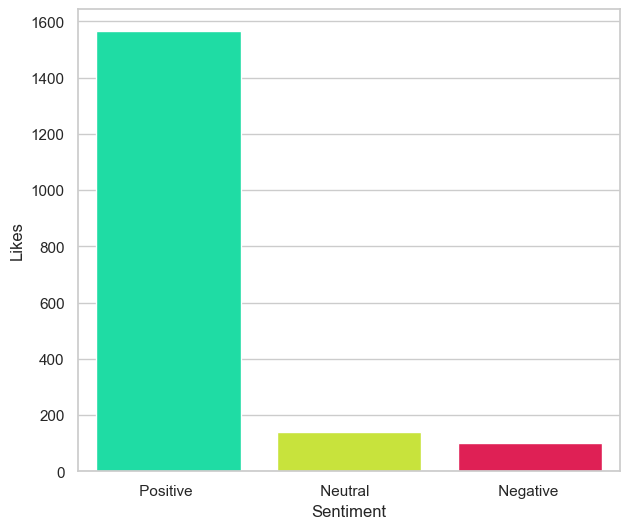

In [40]:
plt.figure(figsize=(7,6))
sns.barplot(x="Sentiment", y="Likes", data=k, palette="gist_ncar", hue="Sentiment", legend=False)
plt.show()


***Insight:*** 
The bar plot visualizes the total likes for the top 10 sentiment categories, highlighting the most liked sentiments.

### Chart 7

## ***Likes vs. Hour of the Day Across Different Platforms***

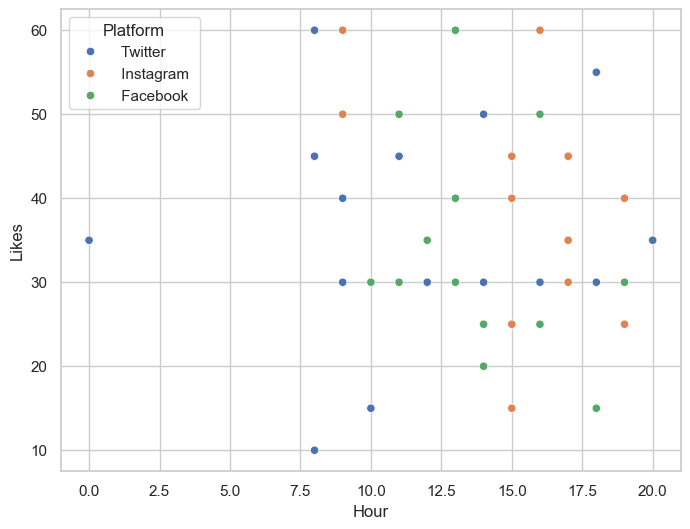

In [41]:
plt.figure(figsize=(8,6))
sns.scatterplot(data = df, x = 'Hour', y = 'Likes',hue = "Platform")
plt.show()

### Chart 8

## ***Top Countries with the Highest Occurrence Count***

In [42]:
k = df["Country"].value_counts().nlargest().reset_index()
b = pd.DataFrame(k)
b

,Country,count
0,USA,6
1,Canada,6
2,India,6
3,USA,5
4,Australia,4


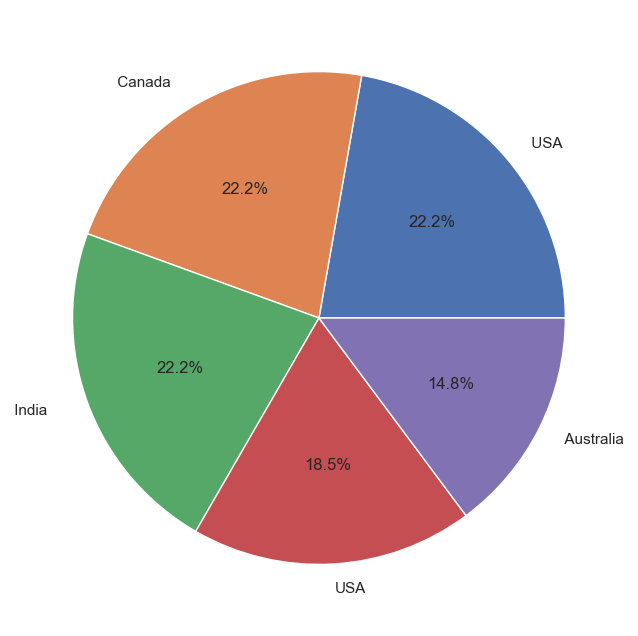

In [43]:
plt.figure(figsize=(12,8))
s = plt.pie(b["count"], labels = b["Country"],autopct='%1.1f%%')
plt.show()

***Insight:*** 
The pie chart illustrates the distribution of occurrences across the top countries, highlighting the proportion of each country's representation.

### Chart 9

## ***Distribution of Occurrences Across the Top Countries***

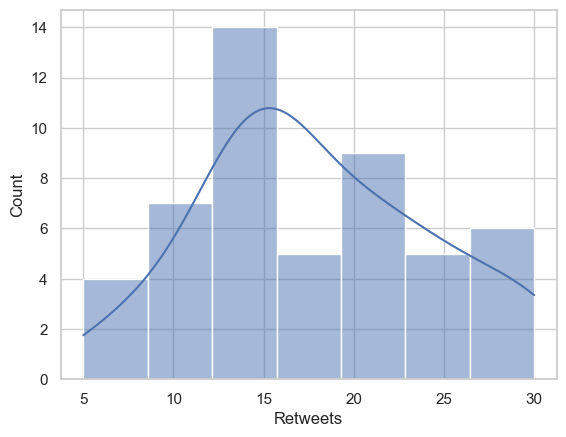

In [44]:
sns.histplot(df.Retweets,kde = True)
plt.show()

***Insight:***
The pie chart visualizes the proportion of occurrences for each of the top countries, showing their relative representation in the dataset.

### Chart 10

## ***Distribution of Likes with KDE***

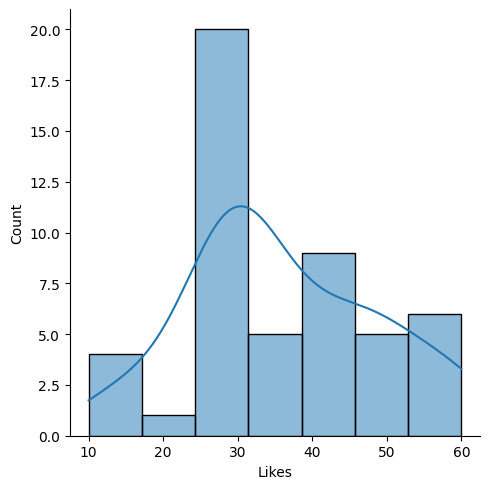

In [18]:
sns.displot(df.Likes,kde = True)
plt.show()

***Insight:*** 
The plot shows the distribution of the Likes data, with a kernel density estimate (KDE) curve highlighting the data's overall trend and density

### Chart 11

## ***Top 10 Most Retweeted Hashtags***

In [16]:
k = df.groupby("PostText")["Retweets"].sum().nlargest(10)
tophash = pd.DataFrame(k)
tophash

,Retweets
PostText,
Coding a new project with enthusiasm.,30
Excited about the upcoming gaming tournament.,30
Political discussions heating up on the timeline.,30
Productive day ticking off my to-do list.,30
Attending a virtual reality meetup.,28
"New year, new fitness goals! ?",28
Attending a virtual conference on AI.,25
Feeling grateful for the little things in life.,25
Feeling inspired after attending a workshop.,25


C:\Users\Janhavi Mane\AppData\Local\Temp\ipykernel_18640\674904860.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Retweets", y="PostText", data=tophash, palette="viridis")


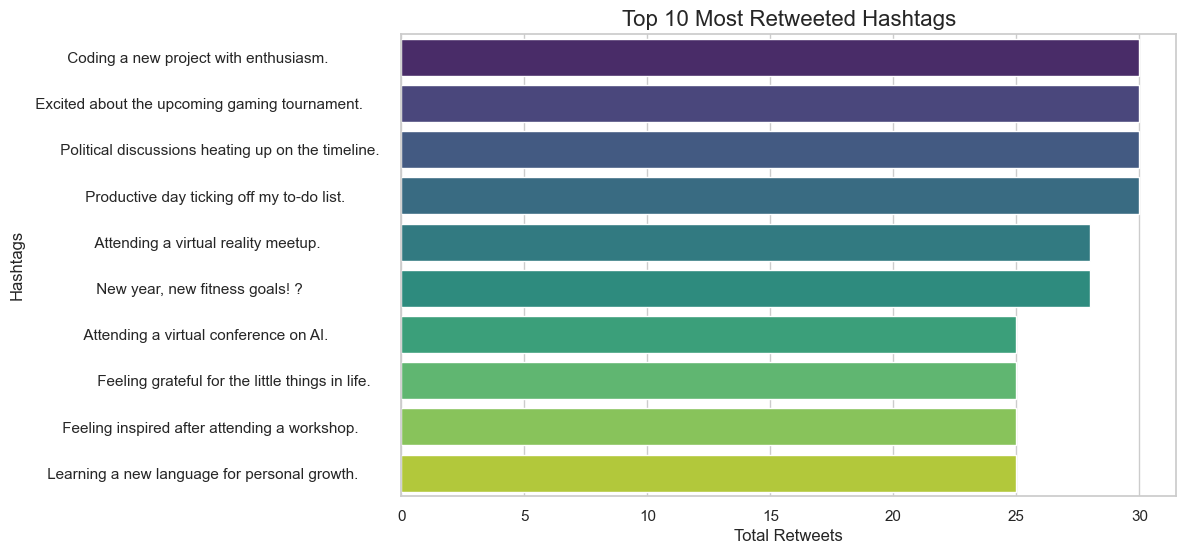

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

# Reset index and avoid adding it as a column
tophash = tophash.reset_index(drop=True)

# Set a style for the plot
sns.set_theme(style="whitegrid")

# Create the barplot
plt.figure(figsize=(10, 6))
sns.barplot(x="Retweets", y="PostText", data=tophash, palette="viridis")

# Add titles and labels
plt.title("Top 10 Most Retweeted Hashtags", fontsize=16)
plt.xlabel("Total Retweets", fontsize=12)
plt.ylabel("Hashtags", fontsize=12)

# Display the plot
plt.show()


***Insight:***
The analysis identifies the hashtags that garnered the highest total retweets, highlighting their popularity and engagement levels.

## Chart 12

## ***Top 10 Most Liked Posts***

In [17]:
k = df.groupby("PostText")["Likes"].sum().nlargest(10)
toplike = pd.DataFrame(k)
toplike

,Likes
PostText,
Coding a new project with enthusiasm.,60
Excited about the upcoming gaming tournament.,60
Political discussions heating up on the timeline.,60
Productive day ticking off my to-do list.,60
Attending a virtual reality meetup.,55
"New year, new fitness goals! ?",55
Attending a virtual conference on AI.,50
Feeling grateful for the little things in life.,50
Feeling inspired after attending a workshop.,50


C:\Users\Janhavi Mane\AppData\Local\Temp\ipykernel_18640\3196239913.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Likes", y="PostText", data=toplike, palette="mako")


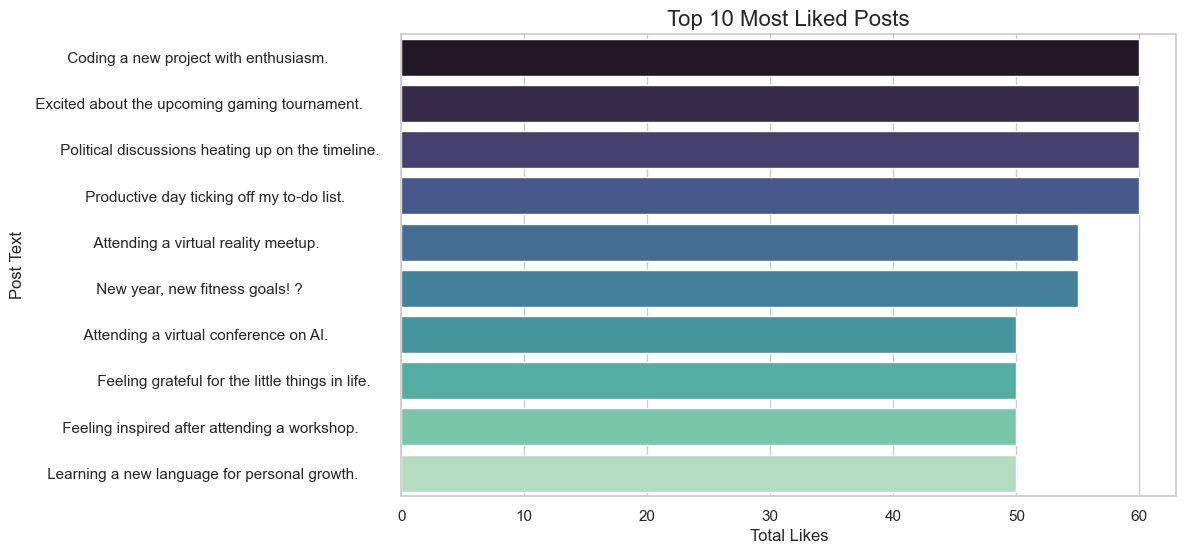

In [30]:
# Reset the index to convert "PostText" from index to a column
toplike = toplike.reset_index()

# Set a style for the plot
sns.set_theme(style="whitegrid")

# Create the barplot
plt.figure(figsize=(10, 6))
sns.barplot(x="Likes", y="PostText", data=toplike, palette="mako")

# Add titles and labels
plt.title("Top 10 Most Liked Posts", fontsize=16)
plt.xlabel("Total Likes", fontsize=12)
plt.ylabel("Post Text", fontsize=12)

# Display the plot
plt.show()


***Insight:***
The analysis identifies the posts that received the highest total likes, highlighting the most engaging content.

# Conclusion

In this analysis, we explored the social media engagement data, focusing on **Likes**, **Retweets**, and **Shares** across different posts. Here are the key findings:

- **Overall Engagement Trends**: The data revealed fluctuating levels of engagement (Likes, Retweets, and Shares), with some posts receiving significantly higher interactions than others, indicating varied audience interest.
  
- **Post Content Impact**: Certain posts, based on their content (e.g., wording or theme), showed more significant engagement, suggesting that content type plays a crucial role in audience interaction.

- **Correlation Between Metrics**: A strong positive correlation was observed between **Likes**, **Retweets**, and **Shares**, indicating that posts with more likes tend to receive more retweets and shares, demonstrating a holistic engagement pattern.

- **Visualization**: A correlation heatmap was used to visualize the relationship between engagement metrics, providing a clear overview of how these factors interact.

- **Insights**: The analysis highlights the importance of content strategy in driving social media engagement. It suggests that posts with high initial engagement (Likes) are likely to receive more amplification (Retweets, Shares), underscoring the viral nature of content.

Overall, this analysis provides valuable insights into social media dynamics, highlighting the interconnectedness of engagement metrics. Further research can refine these patterns to improve content strategies for higher audience engagement and visibility.

# Recommendations

**Focus on High-Engagement Posts for Increased Reach**: Stakeholders should prioritize creating content similar to the high-engagement posts identified in the analysis. By understanding the characteristics of posts that receive more Likes, Retweets, and Shares, social media managers can tailor their content strategy to boost audience interaction.

**Leverage Popular Content Themes for Broader Amplification**: Given the correlation between Likes, Retweets, and Shares, posts that generate higher engagement should be leveraged to increase visibility. Content that performs well should be repurposed or expanded upon to capitalize on its viral potential.

**Enhance Social Media Campaigns with Data-Driven Insights**: Social media teams should use the insights gained from this analysis to design campaigns that align with audience preferences. By analyzing patterns of high engagement, they can target specific content types that resonate more with their audience, increasing overall reach and interaction.

**Invest in Real-Time Engagement Monitoring**: To maintain consistent social media success, it's essential to monitor engagement in real-time. Immediate adjustments based on early feedback (Likes, Shares, Retweets) could help optimize content performance, ensuring greater success and relevance over time.

**Encourage Cross-Platform Sharing**: Since Retweets and Shares are strongly correlated with Likes, encouraging cross-platform sharing of posts can amplify engagement. Social media managers can develop strategies that promote sharing across multiple platforms, increasing post visibility and interaction.

